Follow directions to install pytesseract here: https://www.youtube.com/watch?v=DG5D8A3zi4o

In [85]:
import pytesseract as tess
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pandas as pd

# Replace with the directory to your tesseract executable file, tesseract.exe
tess.pytesseract.tesseract_cmd = r"C:\Users\100707881\AppData\Local\Programs\Tesseract-OCR\tesseract.exe"


In [132]:
# image_to_string

print(tess.image_to_string(img, lang='eng', config='--psm 13 --oem 3 -c tessedit_char_whitelist=0123456789'))

108



In [133]:
# image_to_boxes

# Run tesseract, returning bounding boxes and interpreted digits. Whitelist digits only.
boxes = tess.image_to_boxes(img, lang='eng', config='--psm 13 --oem 3 -c tessedit_char_whitelist=0123456789')
print(boxes)

1 108 134 125 340 0
0 242 149 396 328 0
8 464 103 631 336 0



In [134]:
# image_to_data

text = tess.image_to_data(img, lang='eng', config='--psm 13 --oem 3 -c tessedit_char_whitelist=0123456789', output_type='data.frame')
print(text)

   level  page_num  block_num  par_num  line_num  word_num  left  top  width  \
0      1         1          0        0         0         0     0    0    736   
1      2         1          1        0         0         0   108   73    523   
2      3         1          1        1         0         0   108   73    523   
3      4         1          1        1         1         0   108   73    523   
4      5         1          1        1         1         1   108   73    523   

   height  conf   text  
0     413    -1    NaN  
1     237    -1    NaN  
2     237    -1    NaN  
3     237    -1    NaN  
4     237    84  108.0  


Interpreted digits: 108

   conf   text
4    84  108.0


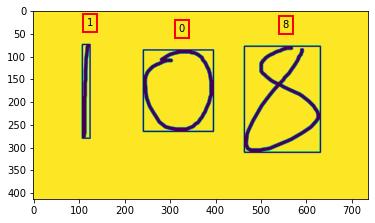

In [131]:
#Read image file and get height and width
filename = 'test.png'
img = cv2.imread(filename,0)
h, w = img.shape

# Run tesseract, returning bounding boxes and interpreted digits. Whitelist digits only.
boxes = tess.image_to_boxes(img, lang='eng', config='--psm 13 --oem 3 -c tessedit_char_whitelist=0123456789')

#Print out the interpreted digits.
print(f"Interpreted digits: {tess.image_to_string(img, lang='eng', config='--psm 13 --oem 3 -c tessedit_char_whitelist=0123456789')}")

#Retrieve confidence statistics. Take only entries where there is a confidence value.
text = tess.image_to_data(img, lang='eng', config='--psm 13 --oem 3 -c tessedit_char_whitelist=0123456789', output_type='data.frame')
text = text[text.conf != -1]
print(text[['conf','text']])

# For each digit detected...
for b in boxes.splitlines():
    b = b.split()    
    midwidth = (int(b[1]) + int(b[3]))/2  
    
    # Draw a green rectangle around the digit
    img = cv2.rectangle(img, ((int(b[1]), h - int(b[2]))), ((int(b[3]), h - int(b[4]))), (0, 255, 0), 2)
    
    # Draw a red rectangle with the detected digit above the corresponding number
    plt.text(midwidth,h-int(b[4])-40,b[0],bbox=dict(fill=False, edgecolor='red',linewidth=2))
    

# Display the image
plt.imshow(img)